<a href="https://colab.research.google.com/github/GabriellebWright/STAT-7220-Applied-Experimental-Design/blob/Personal---Notes/Copy_of_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "GabrielleBWright"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
    print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW1"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/GabrielleBWright/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/GabrielleBWright/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1


# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: September 12, 2025**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment

The objective of the experiment is to test whether aging time (3,4 or 5 weeks) affects the bitterness (IBUs) of the IPA.

**Question 2.** Specify the outcome variable

The outcome variable ould be the IBU's of each batch after 3, 4, and 5 weeks.

**Question 3.** Specify the independent variable. What are some possible lurking variables?

Independent variable is the aging time.

Possible lurking variables may be any temperature changes or differences in each of the tanks, measurement errors between samples.   

To help with eliminate lurking variables as much as possible, the tanks would need to be in the same area kept at the same temperature before and during the experiment, make sure all tanks are cleaned and handled in the exact same way before starting the experiment and that measurements are taken carefully to avoid any errors.

**Question 4.** Briefly explain why a completely randomized design is appropriate for this experiment.

Randomized design is appropriate for this experiment because our experimental is just one large batch of IPA and the aging process is randomly assigned so it helps control variation.


**Question 5.** State the null and alternative hypotheses for this experiment.

$$ H_0: \mu_{\text{three weeks}} = \mu_{\text{four weeks}}=\mu_{\text{five weeks}} $$

$$ H_1: \text{At least one pair of means differ substantially} $$

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weeks   30 non-null     object 
 1   IBU     30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes
           mean        std
Weeks                     
3 Weeks  45.657   5.548563
4 Weeks  60.164  10.390411
5 Weeks  71.791  12.627946


Text(0, 0.5, 'IBU')

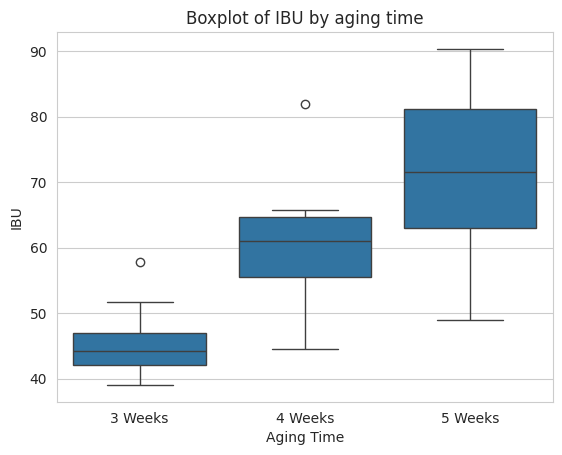

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


##Import the IPA Data ##

ipa = pd.read_excel('IPA.xlsx')

## Data integrity check with.info ##

ipa.info()

## Calculate Mean and Standard Deviation of IBU's by aging time ##

IPA_stats = ipa.groupby('Weeks')['IBU'].agg(['mean','std'])

print(IPA_stats)

## Generate Boxplot for Visual Comparison ##

## Set style (default is "darkgrid") ##

sns.set_style("whitegrid")

## Create boxplot ##

sns.boxplot(x="Weeks",y="IBU",data=ipa)

## Add Title and Labels ##

plt.title("Boxplot of IBU by aging time", loc='center')
plt.xlabel("Aging Time")
plt.ylabel("IBU")



IPA's aged for longer (5 weeks) have higher IBU's than the other weeks and it is a pretty large difference between weeks 3 and 4. There is a small amount of overlap of boxes between weeks 4 and 5 but no overlap at all between any other boxes.

I would assume that that these results so far do not support the null hypothesis and are more aligned with the alternative hypothesis.

**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?


In [ ]:
## Fit One-Way ANOVA Model ##

IPA_mod = ols("IBU~Weeks",data=ipa).fit()

## Print ANOVA Table ##

print(sm.stats.anova_lm(IPA_mod,typ=1))

            df      sum_sq      mean_sq          F    PR(>F)
Weeks      2.0  3428.75378  1714.376890  17.246546  0.000015
Residual  27.0  2683.90994    99.404072        NaN       NaN


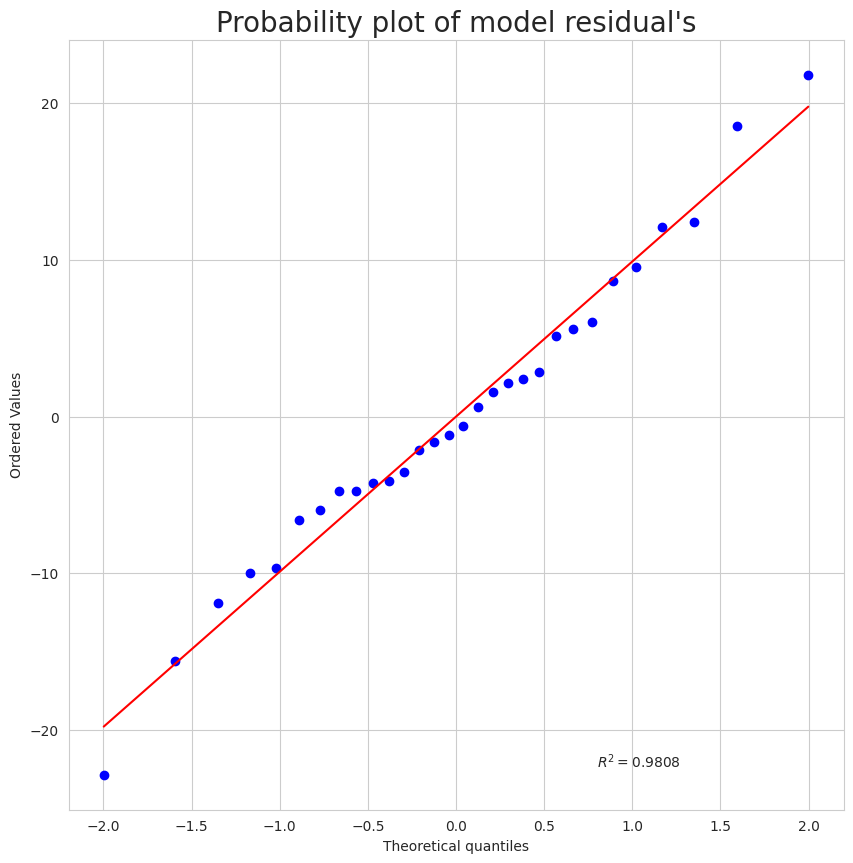

In [ ]:
##Testing normality with visual##
## Extract Model Residuals ##

residuals = IPA_mod.resid

## Generate QQ plot ##

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(residuals, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()


In [ ]:
## Perform Shapiro-Wilk Test of Normality ##
stats.shapiro(residuals)



ShapiroResult(statistic=np.float64(0.9876508728828111), pvalue=np.float64(0.9734239573476953))

Q-Q Plot
  - There is dome deviation at the tails but I do not believe it is substantial, I would conclude that the the Q-Q please gives evidence to support the normality assumption.

Shapiro Wilk Test

$$ H_0: \text{The Normality Assumption is Met} $$

$$ H_1: \text{The Normality Assumption is Not Met} $$

  - The test statistic = .98 which is larger than .05, tells us that the data more strongly support the null hypothesis. This means that the assumption of normality is supported by the data.

Question 8. Test the assumption of homogeneity of variance using both a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?



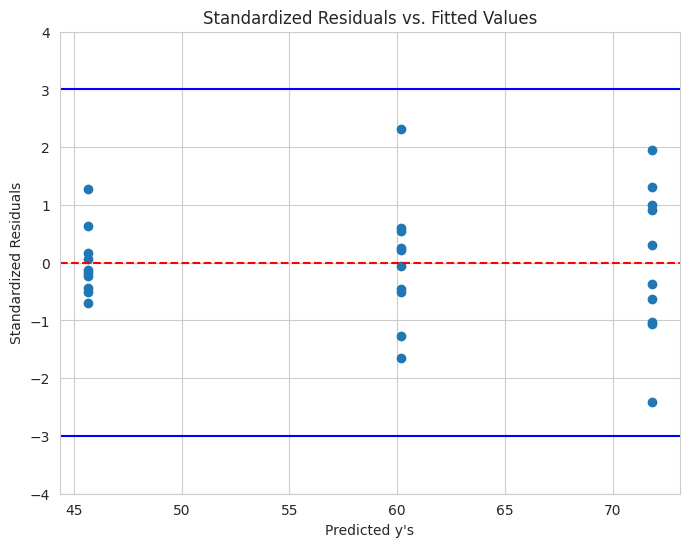

In [ ]:
##Testing homogeneity with visual##
## Obtain Standardized Residuals ##

standardized_residuals = IPA_mod.get_influence().resid_studentized_internal

## Get the fitted values ##

fitted_values = IPA_mod.fittedvalues

## Create the plot ##

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, standardized_residuals)
plt.axhline(y=0, linestyle='dashed', color='red')
plt.axhline(y=3, color='blue')
plt.axhline(y=-3, color='blue')
plt.xlabel("Predicted y's")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals vs. Fitted Values")
plt.style.use('classic')
plt.show()

In [ ]:
##Testing homogeneity with B=P Test##
## Import necessary function: ##

from statsmodels.stats.diagnostic import het_breuschpagan

## Run B-P Test ##

bp_test = het_breuschpagan(IPA_mod.resid,IPA_mod.model.exog)

## Extract F-statistic ##

f_statistic = bp_test[2]

## Extract its P-Value ##

f_p_value = bp_test[3]

print(f"F-statistic: {f_statistic}")
print(f"F p-value: {f_p_value}")


F-statistic: 1.9302562326002541
F p-value: 0.16461466112533732


Scatter Plot
  - I do not believe there is a drastic difference between the width of the lines and the residuals are mostly centered around 0. I would conclude that the constant variance assumption is supported by the data.

B-P Test

$$ H_0: \text{Variance is Constant} $$

$$ H_1: \text{Variance is Not Constant} $$

  - The p-value is .1645=6 which is larger than .05 that shows the data supports the null hypothesis, so the  assumption of homogenity of variance is reasonable for the ANOVA model.




Question 9. Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?

Our  $F_{\text{Stat}} = 17.25$ and has an associated p-value of 0.000015.
The p-value being less than .05, shows that the data more strongly support the alternative hypothesis.

$$ H_0: \mu_{\text{three weeks}} = \mu_{\text{four weeks}}=\mu_{\text{five weeks}} $$

$$ H_1: \text{At least one pair of means differ substantially} $$

Question 10. If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Perform Tukey's HSD test ##

tukey_result = pairwise_tukeyhsd(endog=ipa['IBU'], groups=ipa['Weeks'],
                                 alpha=0.05)

print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
3 Weeks 4 Weeks   14.507 0.0083  3.4518 25.5622   True
3 Weeks 5 Weeks   26.134    0.0 15.0788 37.1892   True
4 Weeks 5 Weeks   11.627 0.0378  0.5718 22.6822   True
------------------------------------------------------




Question 11. Write a brief, contextual conclusion summarizing the results of your analyses.

Evaluated whether aging the new IPA for 3, 4, or 5 weeks affects its bitterness (measured in IBUs). The results show a clear upward trend in bitterness with longer aging times.

A one-way ANOVA model confirmed that aging time has a statistically significant effect on IBUs. The assumptions of normality (Shapiro–Wilk test) and equal variances (Breusch–Pagan test) were satisfied, supporting the reliability of the model.

Follow-up analysis using Tukey’s HSD test revealed that all pairwise comparisons between the three aging times were statistically significant. This means the observed differences are genuine and not due to random variation.

In conclusion, aging time has a strong and consistent impact on IPA bitterness: the longer the beer ages, the more pronounced the bitter character becomes, with the 5-week aging period producing the highest IBU levels.